# Classification with the Iris Dataset

Iris dataset is the most common dataset used inteaching machine learning. 

In [2]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [3]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

In [4]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [6]:
# See the data 
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# Summary statistics.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


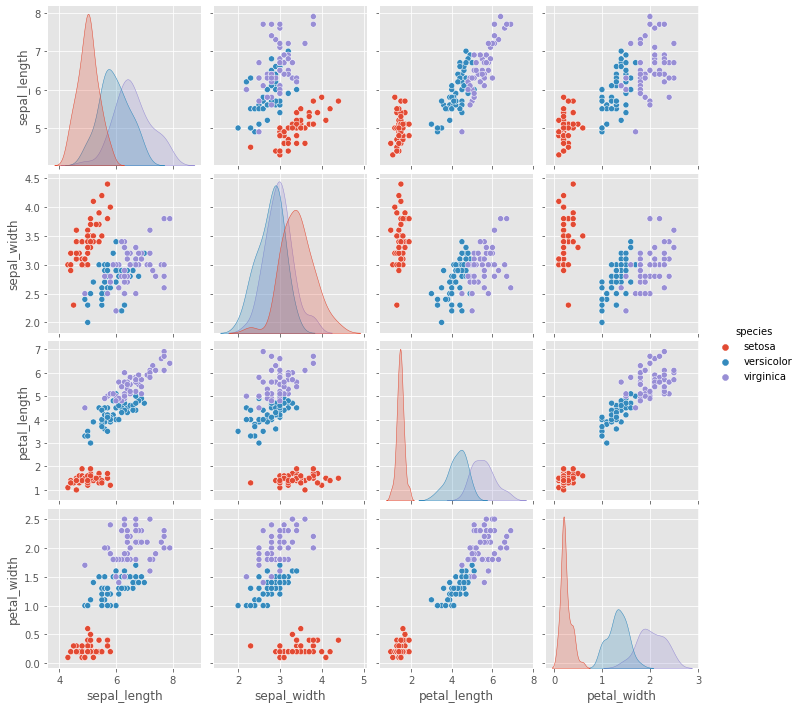

In [9]:
# Sacatter plot and kdes
sns.pairplot(df, hue="species");

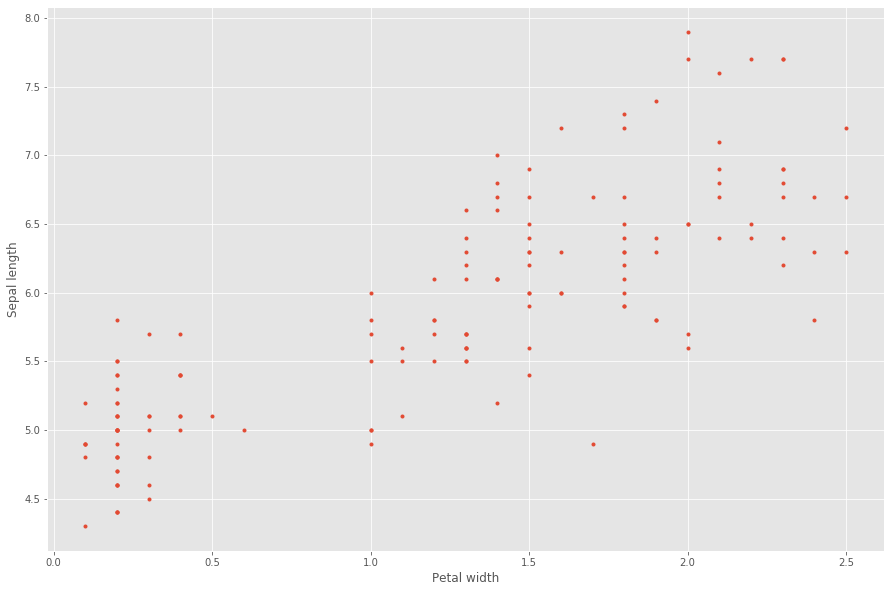

In [13]:
# New figure.
# learn about ax fig
# https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['petal_width'], df['sepal_length'], '.')

# Set axis labels.
ax.set_xlabel('Petal width');
ax.set_ylabel('Sepal length');

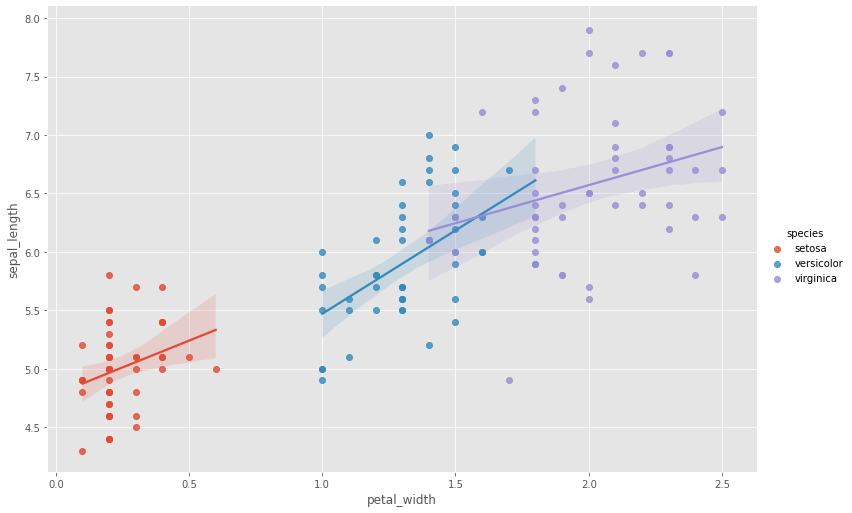

In [17]:
# Seaborn is great for creating plots with one command
sns.lmplot(x = "petal_width", y = "sepal_length", hue = 'species', data = df, fit_reg=True, height =7, aspect = 1.5);

### Pyplot

Using pyplot to get the same data as the above sns output

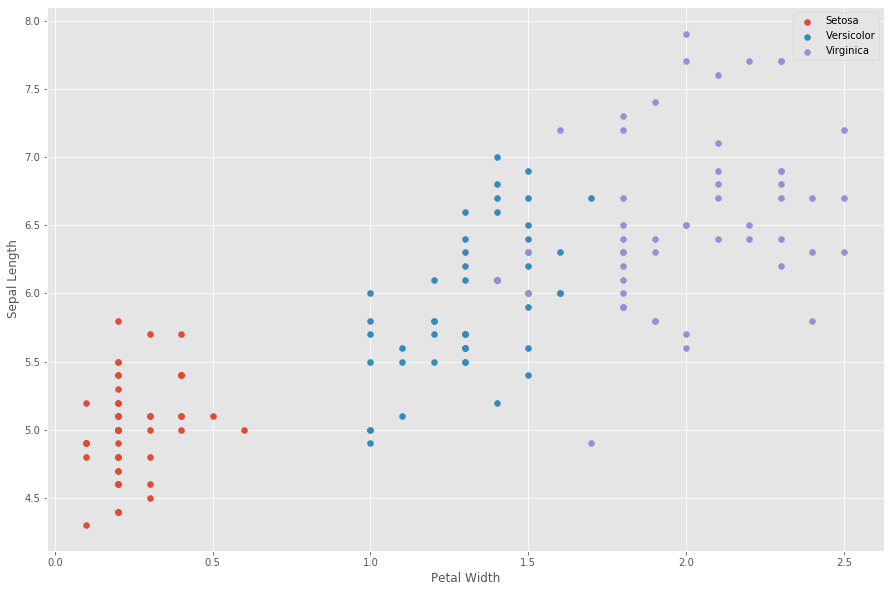

In [23]:
# Segregate the data.
setos = df[df['species'] == 'setosa']
versi = df[df['species'] == 'versicolor']
virgi = df[df['species'] == 'virginica']

# new plot
fig, ax = plt.subplots()

ax.scatter(setos['petal_width'], setos['sepal_length'], label= "Setosa");
ax.scatter(versi['petal_width'], versi['sepal_length'], label= "Versicolor")
ax.scatter(virgi['petal_width'], virgi['sepal_length'], label= "Virginica")

# legend
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.legend();

### Using groupby



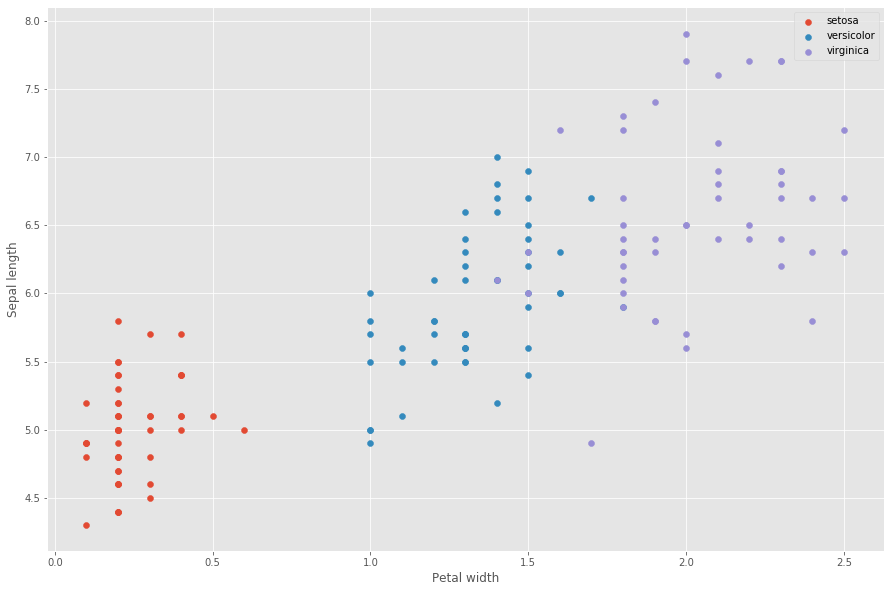

In [31]:
# now plot
fig, ax= plt.subplots()

# using pandas groupby
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label= species)


# Show the legend
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [34]:
# Groupby typically takes a categorical variable. Here we see x is a dataframmegroupby object
x = df.groupby('species')
x

In [41]:
# Looping through groupby(). i is group by value, j are the values associated with this.
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'setosa'
j looks like:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


i is: 'versicolor'
j looks like:
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor


i is: 'virginica'
j looks like:
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica



### Train Test Split

In [47]:
# Split the data frame in two.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# takes array df as argument
train, test = mod.train_test_split(df)

In [43]:
# Show some training data.
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
65,6.7,3.1,4.4,1.4,versicolor
18,5.7,3.8,1.7,0.3,setosa
77,6.7,3.0,5.0,1.7,versicolor
48,5.3,3.7,1.5,0.2,setosa


In [44]:
test.index.size

38

In [45]:
train.index.size

112

### Two Dimensions: Inputs and outputs


In [48]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['sepal_length', 'petal_width']], train['species']

### Two Dimensions: Logistic regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [52]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['sepal_length', 'petal_width']])
predictions

array(['setosa', 'setosa', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica'], dtype=object)

In [51]:
# Eyeball the misclassifications.
predictions == test['species']

19      True
35      True
69      True
20      True
124     True
82      True
93      True
84     False
26      True
132     True
116     True
117     True
71      True
121     True
73      True
80      True
115     True
136     True
61     False
3       True
102     True
67      True
128     True
21      True
4       True
49      True
58      True
2       True
98      True
135     True
83     False
106     True
37      True
118     True
29      True
8       True
140     True
68     False
Name: species, dtype: bool

In [53]:
# What proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], test['species'])

0.8947368421052632